# Проект E-Commerce: Анализ международного рынка видеоигр для формирования маркетинговой стратегии продвижения на локальном рынке.

**ОПИСАНИЕ ПРОЕКТА:**
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Для анализа предоставлены следующие данные:**
* Название игры
* Платформа
* Год выпуска игры
* Жанр игры
* Продажи в Северной Америке (миллионы проданных копий)
* Продажи в Европе (миллионы проданных копий)
* Продажи в Японии (миллионы проданных копий)
* Продажи в других странах (миллионы проданных копий)
* Оценка критиков (максимум 100)
* Оценка пользователей (максимум 10)
* Рейтинг от организации ESRB 

**Цели исследования:**
* Изучить предоставленные данные, проверить корректность данных, провести предобработку данных для анализа
* Провести исследовательский анализ данных, выявить общие паттерны и закономерности
* Составить портрет пользователя каждого региона
* Определить предпочтения пользователей в регионах и влияние рейтингов и оценок на продажи видеоигр
* Предоставить рекомендации для отдела маркетинга по прогнозу потенциала продаж игр по платформам

  **Ход исследования**:
  * Изучение данных
  * Предобработка данных
  * Исследовательский анализ данных:
    * определение актуального периода для прогноза
    * изучение динамики продаж и точек роста по игровым платформам
    * оценка влияния рейтинга пользователей и критиков на продажи
    * исследование продажи игр разных жанров
  * Изучение предпочтений пользователей в разных регионах
  * Формулирование общего вывода по исследованию
    
    

## Изучение данных

### *Импортируем библиотеки данных и загрузим датасет:*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### *Выведем основную информацию о датафрейме:*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### **Изучив данные, мы заметили наличие пропусков и несоответствие типов данных в некоторых случаях. Следовательно данным требуется предобработка.**

## Предобработка данных

### *Для удобства работы со столбцами заменим их названия строчными буквами:*

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### *Проверим датасет на предмет наличия пропущенных значений*

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### *Обработаем пропущенные значения*

#### *В названии игр и жанре всего 2 пропущенных значения - можем удалить эти строки. Аналогично с годом релиза: пропущенных значений относительно немного и восстановить их с учетом имеющихся данных не представляется возможным - также можем удалить эти строки.* 

In [7]:
data = data[~data['name'].isna()]

In [8]:
data = data[~data['year_of_release'].isna()]

In [9]:
data = data[~data['genre'].isna()]

#### *В столбцах с оценками критиков и пользователей  также есть пропущенные значения. Их не стоит удалять, так как в таком случае мы лишимся большого количества других данных для анализа. Кроме того, оценки критиков и пользователей могут быть просто не присвоены части игр. Поэтому пропуски в этих столбцах не будем заполнять.* 

#### *Что касается  пропущенных значений в столбце с возрастным рейтингом, то этот рейтинг присваивается для США и Канады, то есть у части игр его может не быть. Сделаем "Заглушку", заменив пропущенные значения на "no_info".* 

In [10]:
data['rating'] = data['rating'].fillna('no_info')

### *Изменение типов данных*

#### *Год релиза для удобства можно преобразовать в целое число:* 

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int')

#### *Оценку пользователей нам нужно преобразовать в число, но привычный способ astype не работает. Проверим, какие уникальные значения встречаются в данном столбце*

In [12]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

#### *Мы видим большое количество значений tbd - то есть "будет определено". Это можно считать  пропущенными значениями. Используем другой способ преобразования типа данных. Он также преобразует строку в число, но в случае ошибки возвращает NaN:*

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

#### *После проведенных операций проверим, не осталось ли у нас ненужных пропусков:*

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### *Проверка на дубликаты*

In [15]:
data.duplicated().sum()

0

### **Мы провели предобработку данных, заменив или удалив пропущенные значения, где необходимо. А также проверили датасет на дубликаты. Можем переходить к анализу данных.**

## Исследовательский анализ данных

### *Определение актуального периода для прогноза*

#### *Посчитаем суммарные продажи по регионам и запишем их в отдельный столбец:*

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [17]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_info,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_info,28.31


#### *Сгруппируем данные по годам и построим соответствующий график релизов по годам:*

In [18]:
data.groupby('year_of_release').agg(qty=('total_sales', 'count'))

,qty
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


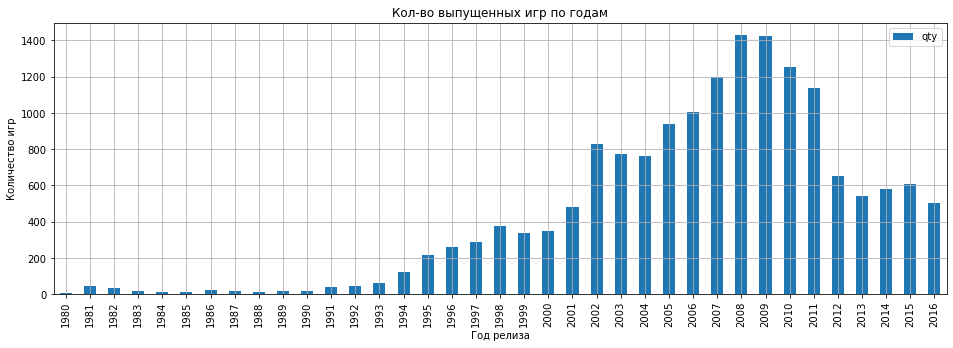

In [19]:
year = data.groupby('year_of_release').agg(qty=('total_sales', 'count')).reset_index().\
plot(kind='bar', x='year_of_release', y='qty', grid=True, figsize=(16, 5));
plt.title('Кол-во выпущенных игр по годам')
year.set(xlabel='Год релиза', ylabel='Количество игр');

#### **Видим, что вплоть до 2008 года количество выпускаемых игр продолжало расти. Пик выпуска мы видим в 2008 и 2009 годах, затем видим значительный спад и стабилизацию на примерно одном уровне, начиная с 2012-го года.**  

#### *Посмотрим теперь, как менялись продажи по годам  релиза в разрезе платформ (возьмем 7 платформ с самыми большими продажами за весь период):*

In [20]:
sort_data = data.groupby('platform').agg(sum=('total_sales', 'sum')).sort_values(by='sum', ascending=False).reset_index()

In [21]:
sort_data = sort_data.query('index <= 7')['platform']

In [22]:
data_platform = data.query('platform in @sort_data')

In [23]:
data_platform = data_platform.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()

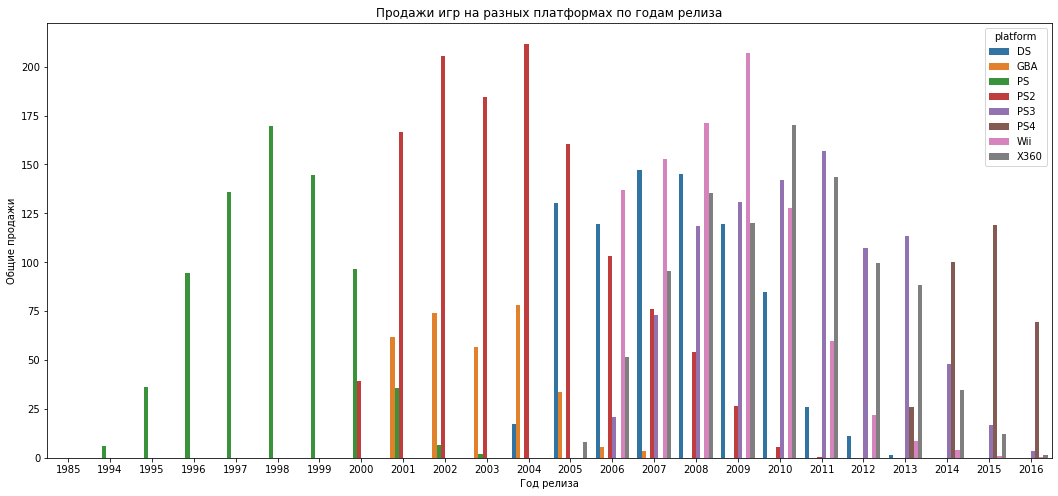

In [24]:
plt.figure(figsize=(18,8))
year_platform = sns.barplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=data_platform)
plt.title('Продажи игр на разных платформах по годам релиза')
year_platform.set(xlabel='Год релиза', ylabel='Общие продажи');
plt.show()

#### *На графике мы видим, как одно поколение платформ сменяло другое. Так, на смену PS2 пришло PS3, а затем PS4. Аналогичная ситуация с Nintendo и Xbox. Анализировать данные по уже ушедшим платформам не иимеет смысла. Поэтому сократим период анализ до игр, выпущенных поозднее 2012 года - то есть возьмем для анализа только актуальные игры. Проверим еще раз правильность выборки посмотрев более детально по выбранным годам:*

In [25]:
data = data[data['year_of_release'] > 2012]

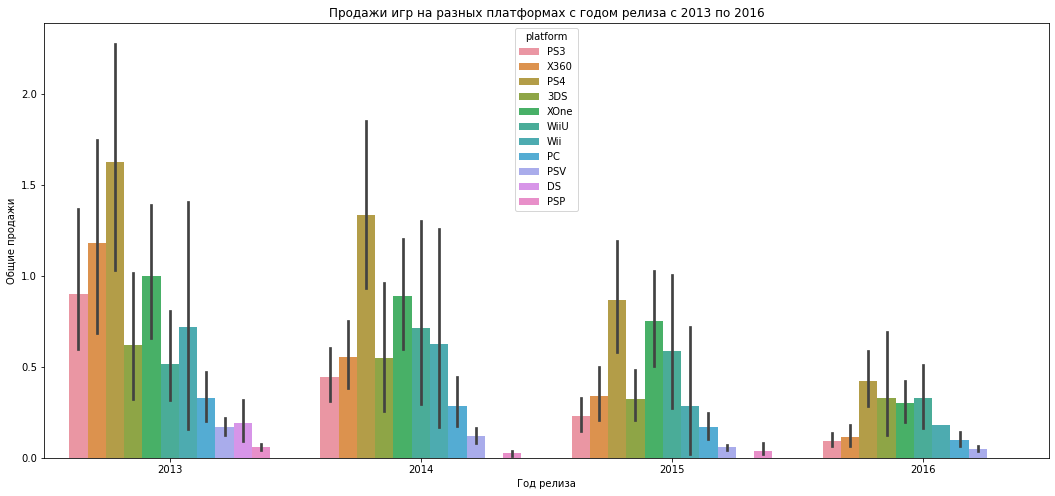

In [26]:
plt.figure(figsize=(18,8))
y_p = sns.barplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=data)
plt.title('Продажи игр на разных платформах c годом релиза с 2013 по 2016')
y_p.set(xlabel='Год релиза', ylabel='Общие продажи');
plt.show()

#### **Мы посмотрели динамику измения выпуска игр по годам на определенных платформах и определили актуальные период, который позволит сделать более качественный прогноз, так как на него не будут влиять усвтаревшие данные по играм для платформ,цикл прибыльности по которым уже прошёл или идёт на спад**

### *Определение наиболее переспективных с точки зрения продаж платформ*

#### *Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам*

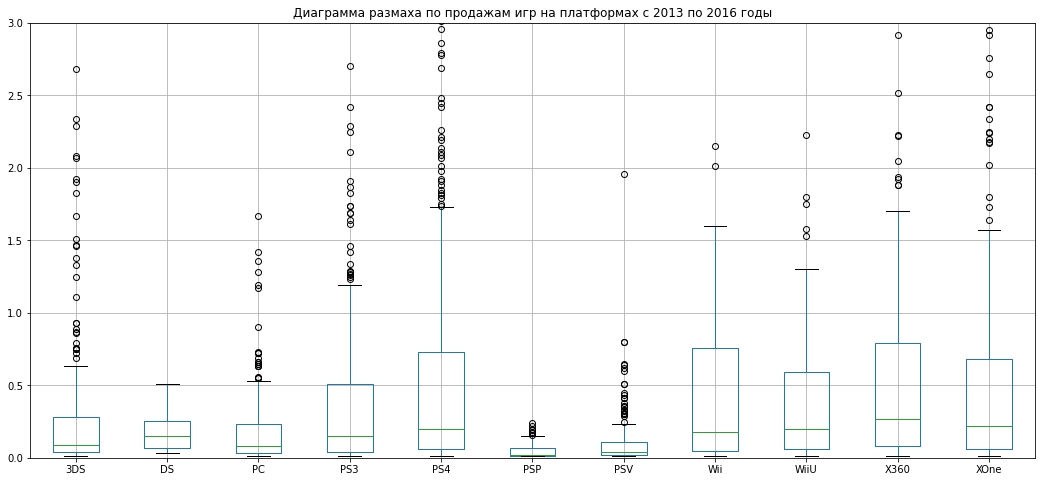

In [27]:
plt.figure(figsize=(18,8))
data.pivot_table(index= 'name', columns= 'platform', values= 'total_sales', aggfunc='sum').reset_index().boxplot()
plt.ylim(0,3)
plt.title('Диаграмма размаха по продажам игр на платформах с 2013 по 2016 годы');

#### *Всё еще видим, что присутствуют игры на платформы, которые уже не так актуальны. Сократим выборку до 2016 года и посмотрим, по каким платформам есть потенциал. Также добавим визуализацию в виде гистограммы:*

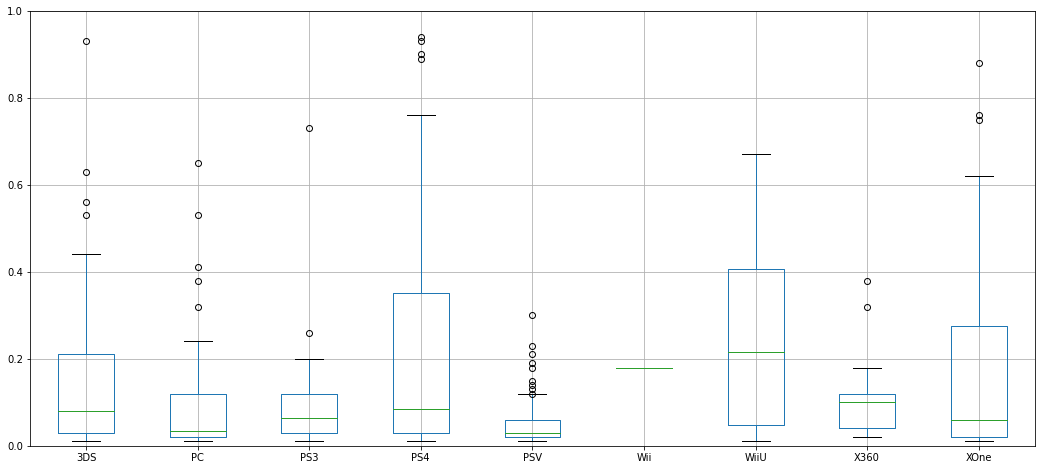

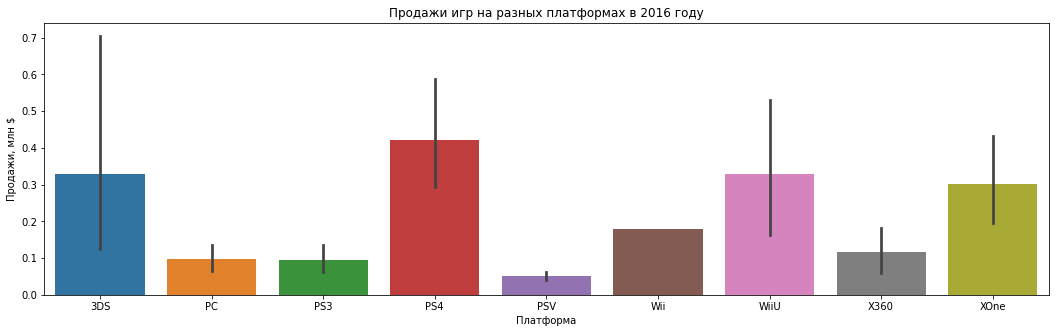

In [28]:
plt.figure(figsize=(18,8))
data.query('year_of_release == 2016').pivot_table(index= 'name', columns= 'platform', values= 'total_sales', aggfunc='sum').reset_index().boxplot()
plt.ylim(0,1)

platform_list = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
plt.figure(figsize=(18,5))
sales = sns.barplot(x='platform',
            y='total_sales', order=platform_list, data=data.query('year_of_release == 2016'))
plt.title('Продажи игр на разных платформах в 2016 году');
sales.set(xlabel='Платформа', ylabel='Продажи, млн $');
plt.show()

#### *Проанализировав графики выше, мы видим, что наибольший потенциал есть у платформ 3DS, PS4, XOne (датасеты скошены вправо, то есть среднее больше, чем медиана и есть потенциал увеличения продаж, так как есть игры, которые продаются значительно большими тиражами, чем среднестатистические). У WiiU продажи распределены более равномерно (нет выбросов), то есть нет каких-то супер хитов, однако и со счетов списывать платформу пока не будем, так как медианное значение у нее выше, чем у остальных и общий уровень продаж достаточно высокий. X360, PS3, PSV и Wii - это устаревшие платформы, не имеют потенциала. PC-игры, хоть и имеют довольно низкие общие продажи, однако диаграмма размаха сильно скошена вправо, следовательно на платформе всё еще выходят хиты, поэтому есть смысл отнести её также к перспективным. Посмотрим еще картину по 5-и выбранным платформам на отдельном графике:*

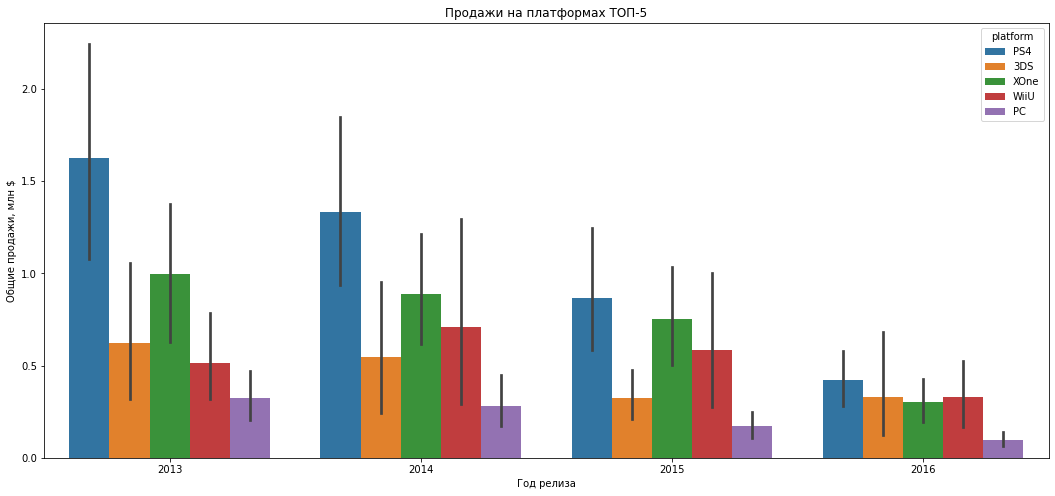

In [29]:
plt.figure(figsize=(18,8))
y_p_5 = sns.barplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=data.query('platform == "PS4" or platform == "PC" or platform == "WiiU" or platform == "XOne" or platform == "3DS"'))
plt.title('Продажи на платформах ТОП-5')
y_p_5.set(xlabel='Год релиза', ylabel='Общие продажи, млн $');
plt.show()

#### **Мы посмотрели на глобальные продажи игр в разрезе платформ и выбрали 5 платформ с наибольшим потенциалом, отсеяв уже неактуальные. Также определилили, что из выбранных платформ PS4 имеет наибольший потенциал, а PC - наименьший.**

### *Влияние оценок критиков и пользователей на продажи игр*

In [30]:
# Комментарий ревьюера
print(len(data.query('critic_score != "no_info"')))
print(len(data.query('user_score != "no_info"')))
print(len(data.query('critic_score != "no_info" and user_score != "no_info"')))

2233
2233
2233


#### *Для начала посмотрим как распределяются оценки внутри топовых платформ:*

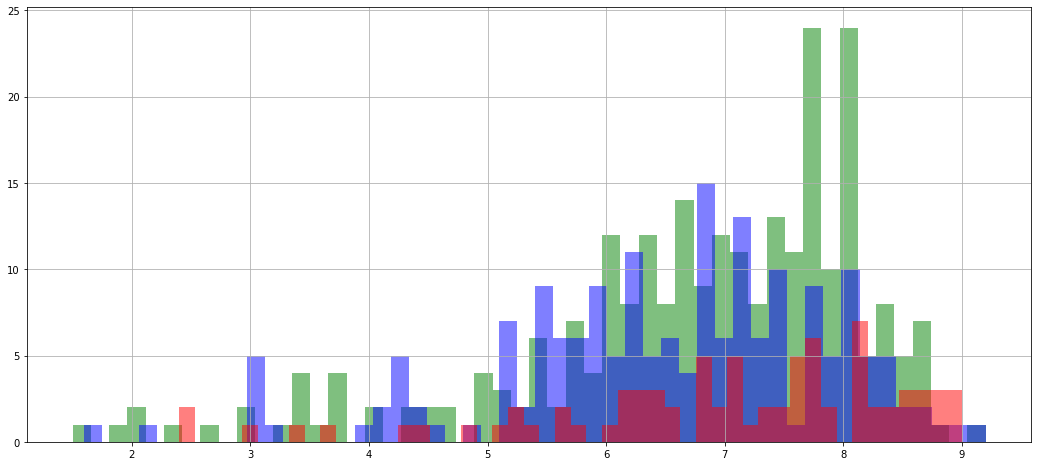

In [31]:
plt.figure(figsize=(18,8))
data[data['platform'] =='PS4']['user_score'].hist(bins=50, alpha=0.5, color='green');
data[data['platform'] =='XOne']['user_score'].hist(bins=50, alpha=0.5, color='blue');
data[data['platform'] =='3DS']['user_score'].hist(bins=50, alpha=0.5, color='red');

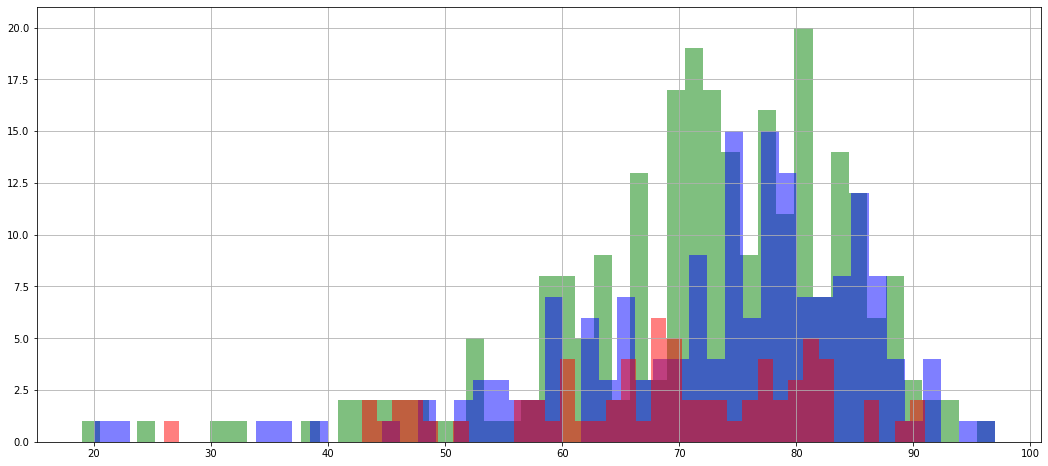

In [32]:
plt.figure(figsize=(18,8))
data[data['platform'] =='PS4']['critic_score'].hist(bins=50, alpha=0.5, color='green');
data[data['platform'] =='XOne']['critic_score'].hist(bins=50, alpha=0.5, color='blue');
data[data['platform'] =='3DS']['critic_score'].hist(bins=50, alpha=0.5, color='red');

#### *На графиках видим, что больше всего высоких оценок, причём как пользователей, так и критиков, у игр на платформе PS4. При этом также можно отметить, что пользователи менее критичны к играм на PS4 (значительно больше оценок выше 7,5, в то время, как у критиков высока доля оценок менее 75)*.Аналогичная ситуация у игр для 3DS (пользователя более благосклонны к играм на платформе, чем критики). У XOne ситуация обратная (критики чаще оценивают игры выше 75, в то время как пользователи ниже 7,5).Можно еще обратить внимание, что самые худшие оценки меньше 2 у пользователей и зрителей имеют игры для PS4.*

#### *Итак, мы выснили, что лучше других оцениваются игры на платформе PS4, при этом и продажи у PS4 наилучшие. Проверим, влияют ли оценки на продажи:*

In [33]:
platform_score = data.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "WiiU" or platform == "PC"')

In [34]:
platform_score = platform_score[['platform', 'name', 'user_score', 'critic_score', 'total_sales']]

#### *Построим диаграммы рассеивания и посчитаем корреляцию между оценками и глобальными продажами. Сделаем это только для выбранных перспективных платформ:*

Корреляция на платформе 3DS 
               user_score  critic_score  total_sales
user_score      1.000000      0.769536     0.241504
critic_score    0.769536      1.000000     0.357057
total_sales     0.241504      0.357057     1.000000


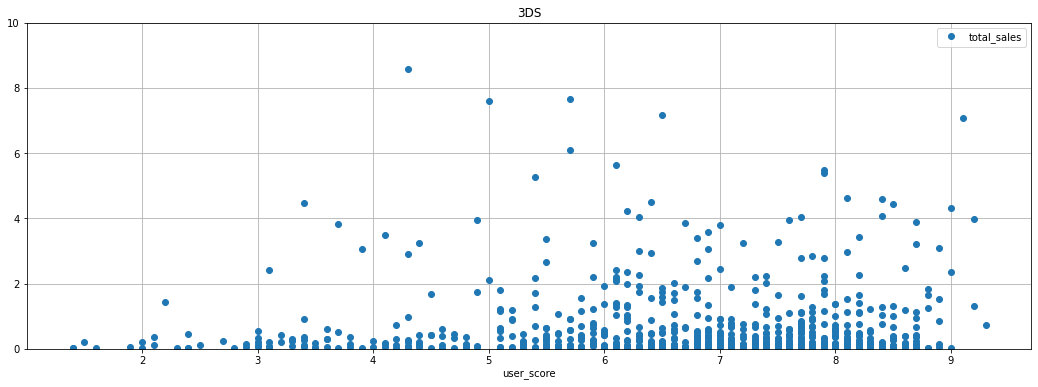

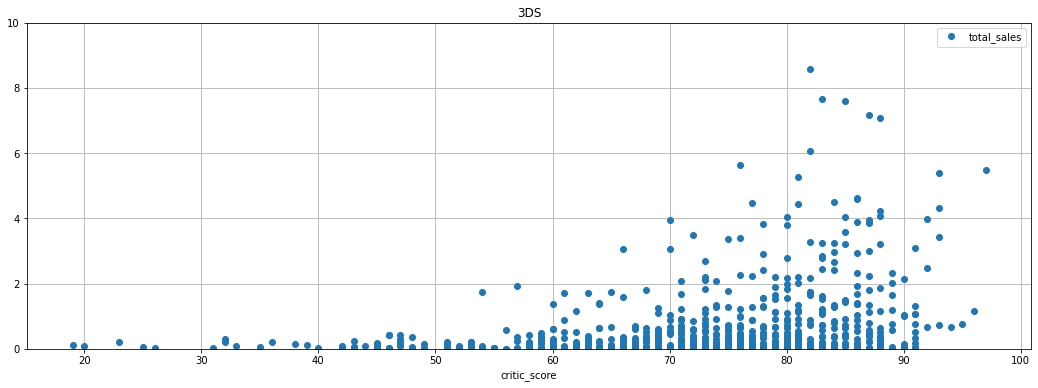

Корреляция на платформе PC 
               user_score  critic_score  total_sales
user_score      1.000000      0.429562    -0.093842
critic_score    0.429562      1.000000     0.196030
total_sales    -0.093842      0.196030     1.000000


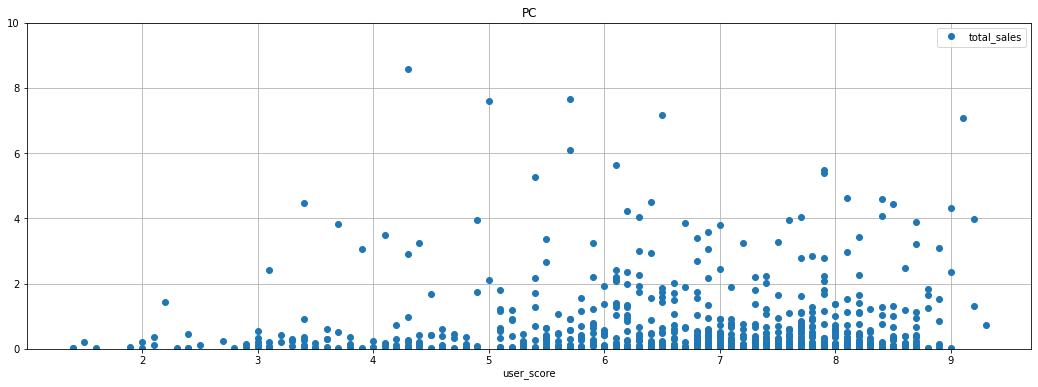

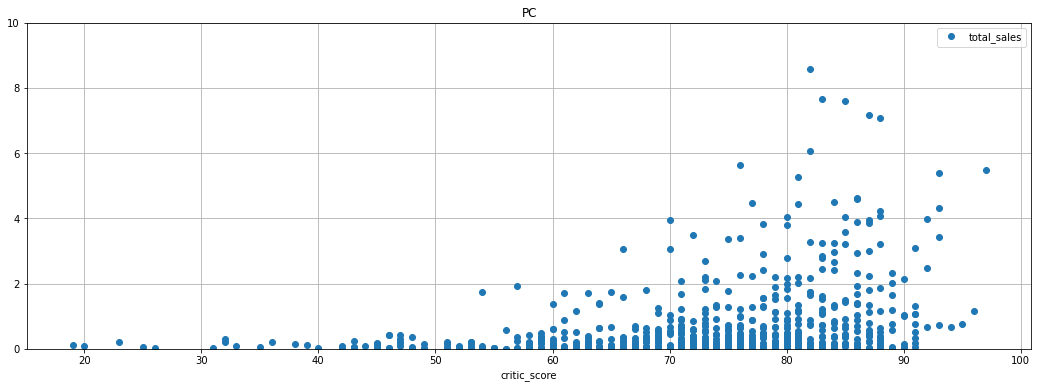

Корреляция на платформе PS4 
               user_score  critic_score  total_sales
user_score      1.000000      0.557654    -0.031957
critic_score    0.557654      1.000000     0.406568
total_sales    -0.031957      0.406568     1.000000


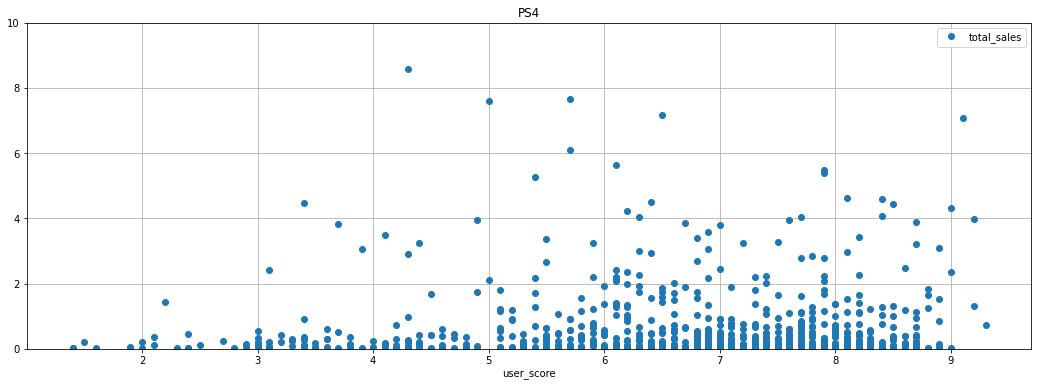

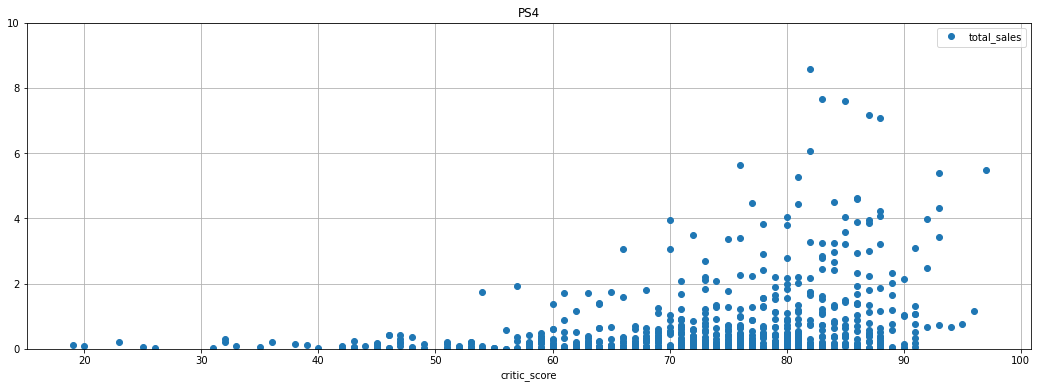

Корреляция на платформе WiiU 
               user_score  critic_score  total_sales
user_score      1.000000      0.721313     0.419330
critic_score    0.721313      1.000000     0.376415
total_sales     0.419330      0.376415     1.000000


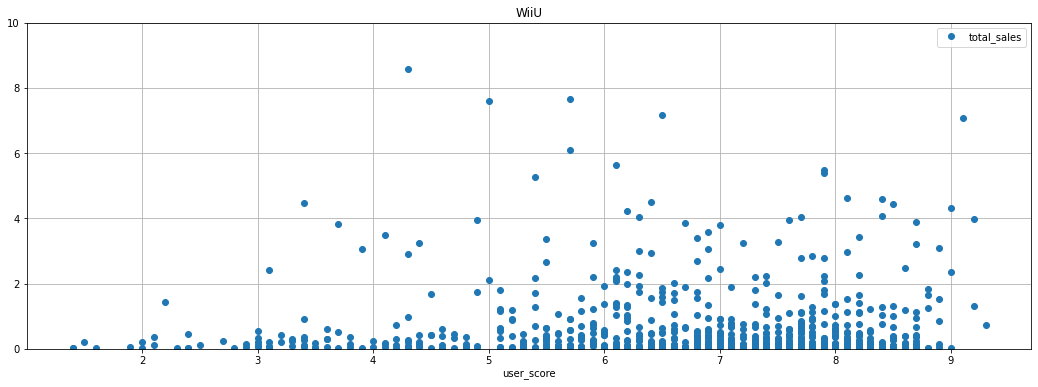

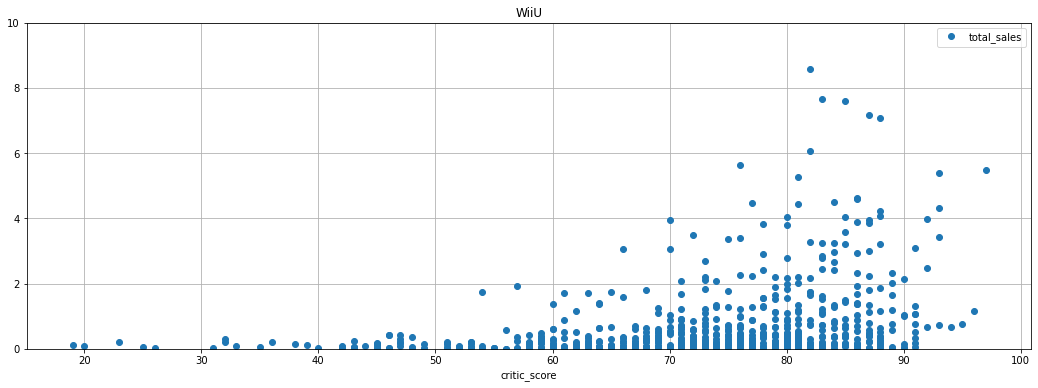

Корреляция на платформе XOne 
               user_score  critic_score  total_sales
user_score      1.000000      0.472462    -0.068925
critic_score    0.472462      1.000000     0.416998
total_sales    -0.068925      0.416998     1.000000


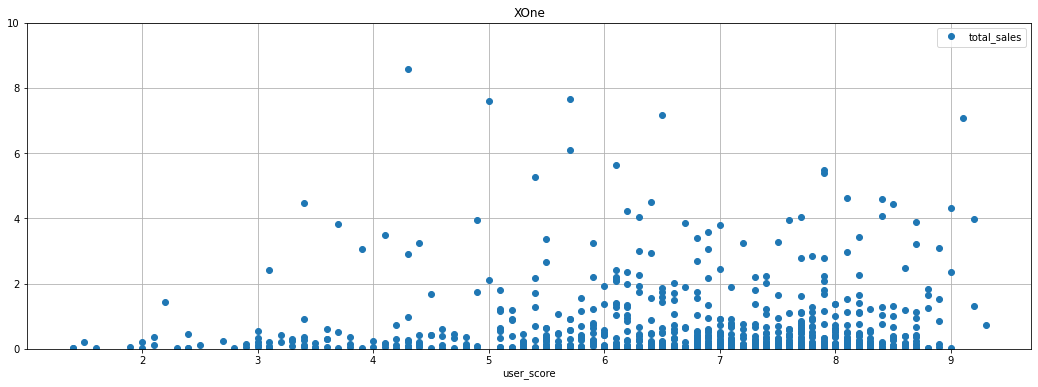

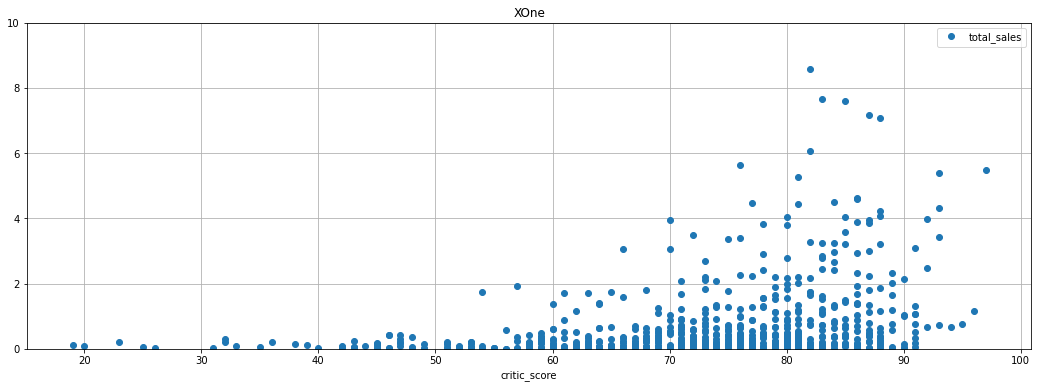

In [35]:
for platform, data_group in platform_score.groupby('platform'):
    print('Корреляция на платформе',platform,'\n', platform_score[platform_score['platform'] == platform].corr())
    platform_score.plot(x='user_score', title=platform, y='total_sales', style='o', ylim=(0, 10), grid=True, figsize=(18, 6));
    platform_score.plot(x='critic_score', title=platform, y='total_sales', style='o', ylim=(0, 10), grid=True, figsize=(18, 6));
    plt.show()

#### *Мы наблюдаем неодназначные результаты. Так, для платформ PS4, XOne и PC отзывы критиков имеют значительное положительное влияние на продажи, при этом отзывы пользователей на продажи оказывают минимальное влияние (а если и оказывают, то в отрицательную сторону). В то же время на платформах 3DS и WiiU и отзывы критиков и отзывы пользователей влияют на продажи положительно, при этом отзывы критиков влияют больше.*   

#### **Итак, мы выявили, что отзывы критиков и пользователей по разному влияют на продажи на разных платформах. Так, мы отметили, что на платформах PS4, XOne и PC картина схожая - вероятно покупатели в основном ориентируются на отзывы критиков при покупке игр, тем не менее небольшое влияние, причем отрицательное, у отзывов пользователей всё-таки есть (вероятно, если у игры оценка пользователей ниже, покупатели всё же обращают на это внимание). Если рассматривать платформы 3DS и WiiU, то здесь и отзывы критиков и отзывы пользователей положительно влияют на продажи (то есть, чем выше оценка, тем больше продажи), однако стоит отметить, что оценка критиков оказывает большее влияние.**    

### *Продажи игр разных жанров*

#### *Сгруппируем данные по жанру и посмотри на глобальные продажи в разрезе жанров, построив диаграмму размаха и гистограмму:*

In [36]:
data_genre = data.groupby('genre').agg({'total_sales':'sum'}).reset_index()

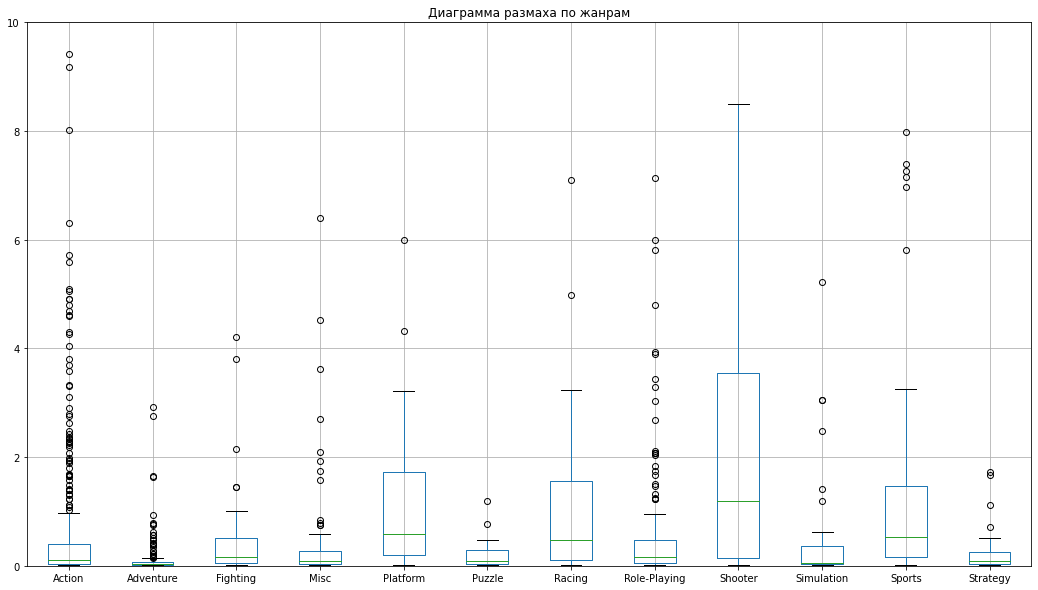

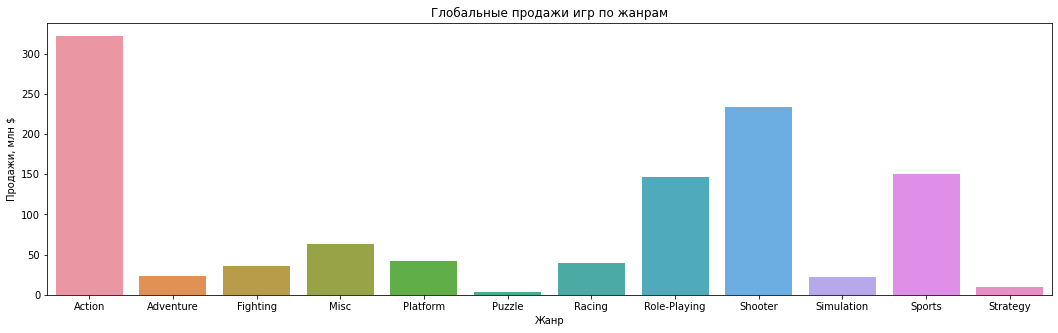

In [37]:
plt.figure(figsize=(18,10))
data.pivot_table(index= 'name', columns='genre', values='total_sales', aggfunc='sum').reset_index().boxplot()
plt.ylim(0,10)
plt.title('Диаграмма размаха по жанрам');

plt.figure(figsize=(18,5))
sales = sns.barplot(x='genre',
            y='total_sales', data=data_genre)
plt.title('Глобальные продажи игр по жанрам');
sales.set(xlabel='Жанр', ylabel='Продажи, млн $');
plt.show()

#### **Можем отметить, что самые продаваемые жанры это Action, Shooter, Sports и Role-Playing. По диаграмме размаха можем отметить, что у всех жанров графики скошены вправо (то есть среднее больше, чем медиана), то есть есть хиты, которые продаются значительно в больших количествах, чем среднестатистические. Больше всего выбросов в жанрах Action  и  Role-playing - можно предположить, что больше всего бестселлеров выходит именно в этих жанрах. Самым стабильным и надежным с точки зрения прибыльности жанром можно назвать Shooting, так как он имеет самое высокое медианное значение и не имеет выбросов, а значит вероятно, что игры в этом жанре среднестатистически продаются лучше, чем в остальных и продажи вероятно более прогнозируемые.** 

### *Портрет пользователя в разных регионах*

#### *Рассмотрим, игры на каких платформах предпочитают пользователи в разных регионах.*

##### *Для дальнейшего анализа возьмём топ-5 ранеее выбранных платформ, остальные платформы обозначим, как "Others":*

In [38]:
for p in data['platform'].unique():
    data.loc[~data['platform'].isin(["PS4", "XOne", "3DS", "WiiU", "PC"]), 'platform'] = "Others"

##### *Теперь построим круговые диаграммы, чтобы определить долю пользователей той или иной платформы в каждом регионе.*

In [39]:
platform_region = data.pivot_table(index='platform', values= ['na_sales', 'jp_sales', 'eu_sales'], aggfunc='sum')
platform_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
Others,123.38,45.79,157.33
PC,25.36,0.00,11.11
PS4,141.09,15.96,108.74
WiiU,19.85,10.88,29.21
XOne,51.59,0.34,93.12


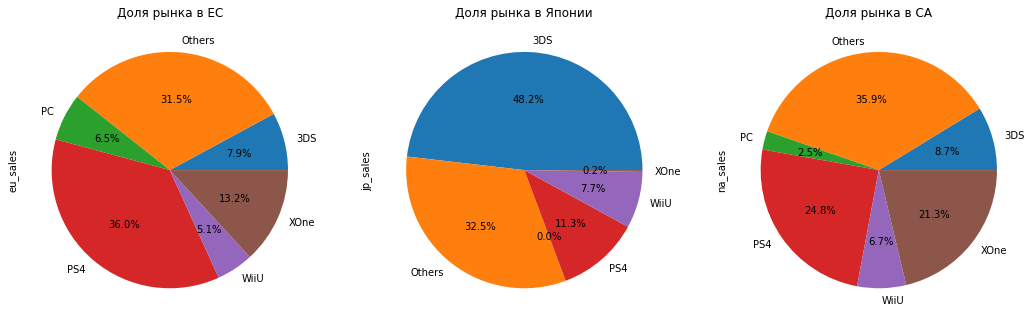

In [40]:
platform_region.plot.pie(title=["Доля рынка в ЕС", "Доля рынка в Японии","Доля рынка в СА"] , legend=False, autopct='%1.1f%%',subplots=True, figsize=(18, 8));

##### **Можно отметить, что рынок Северной Америки отличается наибольшим разнообразием в предпочитаемых платформах, при этом из перспективных платформ лидируют PS4 и XOne, отсуайдерами являются игры для PC.  Что касается рынка Европы, то здесь лидирует платформа PS4, а минимальная доля из перспективных платформ  у WiiU. Рынок Японии в значительной степени отличается от рынков СА и ЕС - здесь пользователи отдают свое предпочтение платформе 3DS, а дочя платформы XOne стремиться к нулю, хотя в ЕС и СА это платформа ввторая по популярности среди перспективных. Также можно отметить, что в Японии игры для PC не продаются.**

#### **Рассмотрим также долю продаж по жанрам в разных регионах**

##### *Для дальнейшего анализа возьмём топ-5 самых прибыльных жанров, остальные обозначим как "Others":*

In [41]:
for g in data['genre'].unique():
    data.loc[~data['genre'].isin(["Action", "Shooter", "Sports", "Role-Playing", "Misc"]), 'genre'] = "Others"

##### *Сделаем группировку по жанрам и построим круговые диаграммы*

In [42]:
genre_region = data.pivot_table(index='genre', values= ['na_sales', 'jp_sales', 'eu_sales'], aggfunc='sum')
genre_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Misc,20.04,9.20,27.49
Others,68.71,28.03,62.76
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27


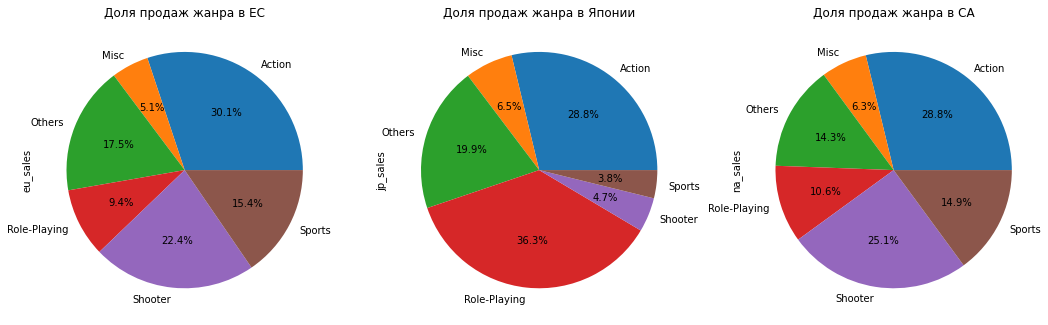

In [43]:
genre_region.plot.pie(title=["Доля продаж жанра в ЕС", "Доля продаж жанра в Японии","Доля продаж жанра в СА"] , legend=False, autopct='%1.1f%%',subplots=True, figsize=(18, 8));

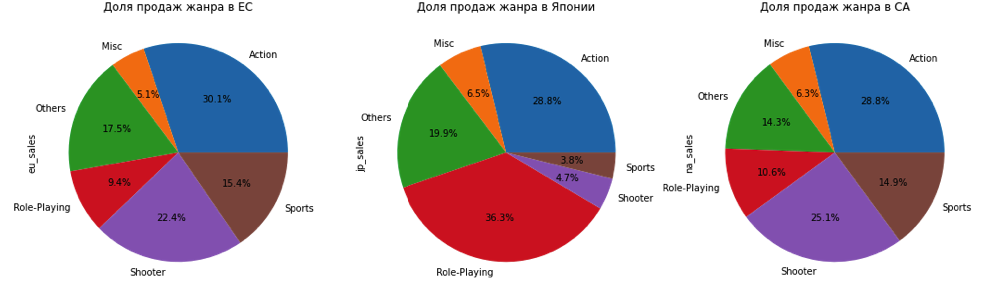

##### **Можно отметить, схожесть жанровых предпочтений пользователей в Европе и Северной Америке - в обоих регионах доминируют жанры Action и Shooting, при этом предпочтения северо-американцев более более разнообразные. Рынок Японии, как и в предыдущем случает отличается от рынков ЕС и СА. Японцы предпочитают игры в жанре Role-Playing, при этом можно отметить низкую долю жанра Shooter, второго по популярности в ЕС и СА.**

#### **А как отражается возрастной рейтинг на продажах в различных регионах:**

##### *Сгруппируем данные по рейтингу и построим столбчатый график:*

In [44]:
data_na_r = data.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).reset_index()

In [45]:
data_jp_r = data.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()

In [46]:
data_eu_r = data.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()

In [47]:
data_region_r = data_na_r\
    .merge(data_jp_r, how='outer', on = 'rating')\
    .merge(data_eu_r, how='outer', on = 'rating')

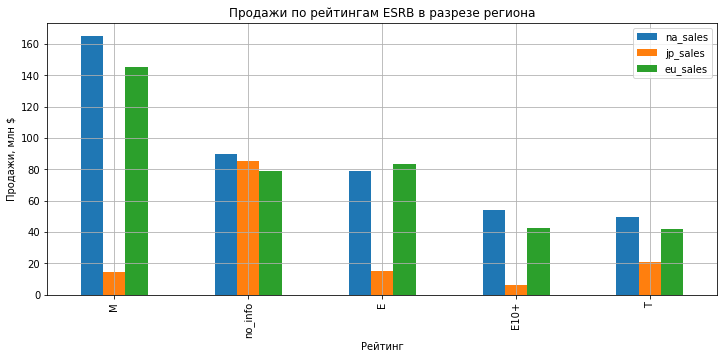

In [48]:
p_r = data_region_r.plot(kind='bar', x='rating', y=['na_sales', 'jp_sales', 'eu_sales'], grid=True, figsize=(12, 5));
plt.title('Продажи по рейтингам ESRB в разрезе региона')
p_r.set(xlabel='Рейтинг', ylabel='Продажи, млн $');

##### **Отмечаем наибольший уровень продаж игр с рейтингом 17+ в Северной Америке и Европе. В Японии лидируют игры без рейтинга, что можно объяснить и тем, что рейтинг ESRB устанавливается для игр, выпущенных для США и Канады и тем, что в других регионах могут устонавливаться свои рейтиги, которые не отображены в датасете (так  Nintendo имеет свою собственную рейтинговую систему, а эта платформа самая популярная в Японии). Как и в предудущих случаях мы  также отмечаем общую схожесть предпочтений пользователей в СА и ЕС.**

#### **Подводя итог в исследовании портрета пользоввателя в разных регионах, можем в первую очередь сконцентрировать внимание на различных предпочтениях пользователей в Европе и Северной Америке с пользователями в Японии. Этот момент необходимы учитывать при формировании программы продвижения.**

### *Проверка гипотез*

#### **Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**

In [49]:
from scipy import stats as st

In [50]:
data = data[~data['user_score'].isna()]

##### *H₀:cредние пользовательские рейтинги платформ Xbox One и PC равны. H₁:cредние пользовательские рейтинги платформ Xbox One и PC не равны. Использум t-test для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.Так как мы не можем точно быть уверены, что дисперсии выборок оценок по платформам равны, то зададим параметр equal_var= False. Уровень статистической значимости установим равным 0.01*

In [51]:
results = st.ttest_ind(
    data[data['platform'] =='XOne']['user_score'], 
    data[data['platform'] =='PC']['user_score'], equal_var = False)

alpha = 0.01 

print(results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


##### **У нас не получилось отвергнуть нулевую гипотезу, то есть мы можем предположить, что средние значения рейтинга пользователей XOne и PC  могут быть равны.**

##### *Посмотрим, как выглядят средние нашей выборки:*

Медианное значение оценки пользователей платформы XOne: 6.8 
 Медианное значение оценки пользователей платформы PC: 6.8 
 Среднее значение оценки пользователей платформы XOne: 6.52142857142857 
 Cреднее значение оценки пользователей платформы PC: 6.269677419354836


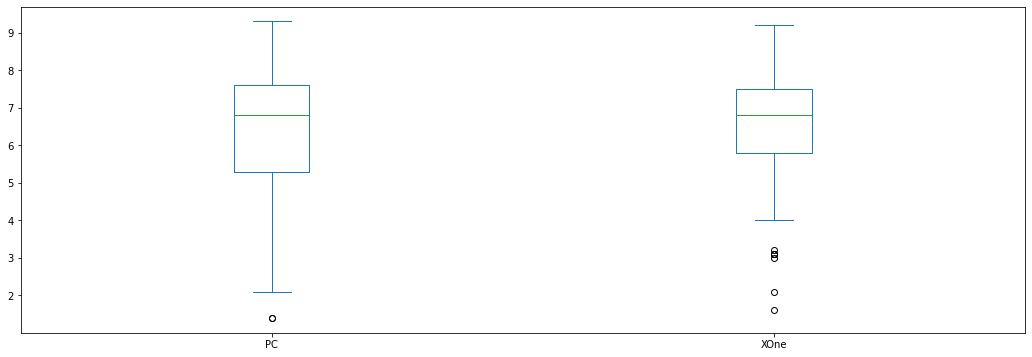

In [52]:
print('Медианное значение оценки пользователей платформы XOne:',data.query('platform == "XOne"')['user_score'].median(),\
     '\n','Медианное значение оценки пользователей платформы PC:',data.query('platform == "PC"')['user_score'].median(),\
     '\n', 'Среднее значение оценки пользователей платформы XOne:',data.query('platform == "XOne"')['user_score'].mean(),\
     '\n','Cреднее значение оценки пользователей платформы PC:',data.query('platform == "PC"')['user_score'].mean())
data.query('platform == "XOne" or platform == "PC"').\
pivot_table(index='name', columns='platform', values='user_score').reset_index().plot.box(figsize=(18,6));

##### *Итак, медианные значения оценок пользователей для XOne и PC в нашей выборке равны, а средние значения очень близки. То есть вполне вероятно, что в генеральной совокупности средние могут быть равны.Также можно заметить, что значения распределяются по разному и дисперсии могут не совпадать, и мы не зря поставили параметр  equal_var = False.*

#### **Теперь проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные:**

##### *H₀:cредние пользовательские рейтинги жанров Action и Sports равны. H₁:cредние пользовательские рейтинги жанров Action и Sports не равны. Использум t-test для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.Так как мы не можем точно быть уверены, что дисперсии выборок оценок по платформам равны, то зададим параметр equal_var= False. Уровень статистической значимости установим равным 0.01*

In [53]:
results = st.ttest_ind(
    data[data['genre'] =='Action']['user_score'], 
    data[data['genre'] =='Sports']['user_score'], equal_var = False)

alpha = 0.01 

print(results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


##### **В данном случае мы отвергаем нулевую гипотезу, то есть вероятно, что среднее значение рейтингов игр в жанрах Action  и Sports разные.**

##### *Посмотрим, как выглядят средние нашей выборки:*

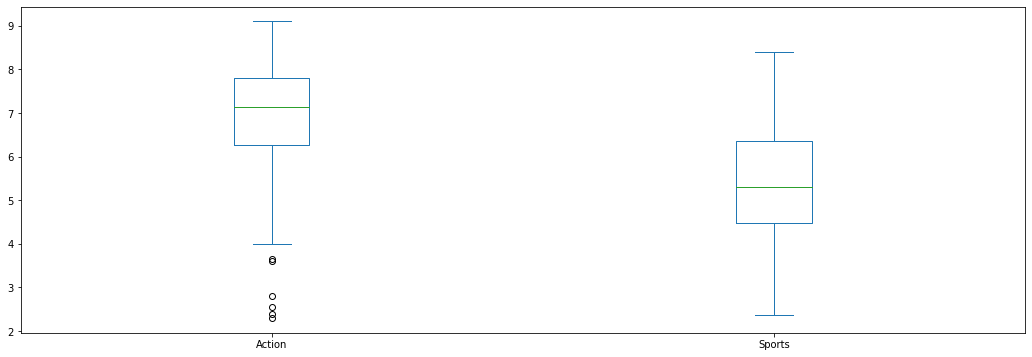

In [54]:
data.query('genre == "Action" or genre == "Sports"').\
pivot_table(index='name', columns='genre', values='user_score').reset_index().plot.box(figsize=(18,6));

##### *Да, действительно, в нашей выборке средние значения оценок игр в жанрах Action и  Sports сильно разнятся. Вполне вероятно, что и в генеральной совокупности эти значения будут разные*

## **ОБЩИЙ ВЫВОД**

### Подводя итоги нашего анализа, можем сакцентировать внимание на следующих выводах, которые необходимо учитвывать при планировании и формировании программы продвижения:

#### - рекомендуется сконцентрироваться на платформах, имеющих наибольший потенциал с точки зрения прибыльности, так как большая часть платформ теряет свою актуальность.

#### - рекомендуется учитывать отличающиеся предпочтения пользователей в зависимости от региона продаж, так как, учитывая проведенный анализ, для рынка Японии  предпочтения покупателей сильно отличаются:

##### - для продвижения в СА и ЕС рекомендуется сделать акцент на платформах PS4 и XOne, так как эти платформы там наиболее популярны и имеют значительные доли в продажах, также можно обратить внимание на платформу 3DS -  третью по популярности.  В тоже время на рынке Японии лучше сконцентрировать усилия на продвижении платформы 3DS, так как эта платформа занимает почти 50% рынка Японии,  в тоже время можно продвигать PS4 - вторую по популярности.

##### - также для рынков СА и ЕС можно выделить, как наиболее востребованные,  игры в жанрах Action и Shooter,  а в Японии наиболее популярными являются игры в жанрах Role-Playing и Action.   

##### - для СА и ЕС также стоит учитывать рейтинг ESRB  и то, что наибольшим потенциалом продаж обладают  игры с рейтингом 17+.

#### - рекомендуется учитывать рейтинг критиков, так как мы установили его положительное влияние на продажи во всех регионах (чем выше рейтинг, тем больше потенциал продаж).  В Японии  также стоит учитывать положительное влияние рейтинга пользователей, в то время как ЕС и СА на продажи он почти не влияет.

### Также мы проверили 2 гипотезы и, исходя из результатов проверки, можно предположить, что одни и те же игры на разных платформах имеют примерно одинаковый рейтинг, то есть, например, игры популярные на XOne можно также продвигать на PC - однако это предположение требует дополнительной проверки.